In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [3]:
df = pd.read_csv('DataSets/email_spam_dataset.csv')
df.head()

,Num_Emails,Num_Links,Num_Caps,Msg_Length,Num_Attach,Spam
0,102,14,0,257,0,0
1,179,3,0,233,0,0
2,92,14,7,166,0,1
3,14,5,6,435,1,0
4,106,1,1,106,2,0


In [ ]:
#Define feature and target
X=df.drop("Spam", axis =1)
y= df['Spam']

In [5]:
#traintest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [6]:
#train Desicion Tree(Entropy)
model = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=4)
model.fit(X_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


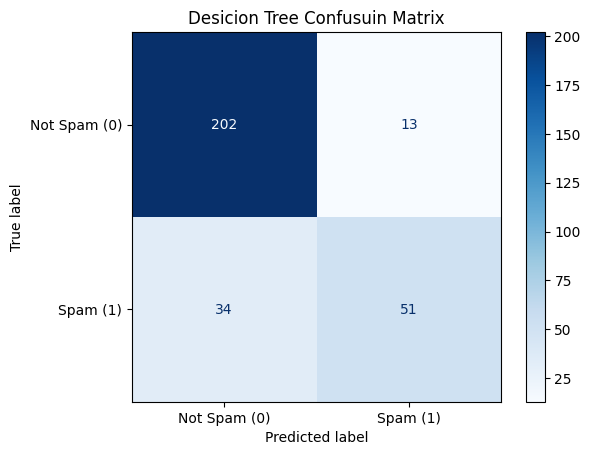

In [9]:
#predication and evalution
from sklearn.metrics import ConfusionMatrixDisplay


y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm, display_labels=["Not Spam (0)", "Spam (1)"]).plot(cmap="Blues")
plt.title("Desicion Tree Confusuin Matrix")
plt.show()

In [10]:
print('Classification Report: ')
print(classification_report(y_test, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       215
           1       0.80      0.60      0.68        85

    accuracy                           0.84       300
   macro avg       0.83      0.77      0.79       300
weighted avg       0.84      0.84      0.84       300



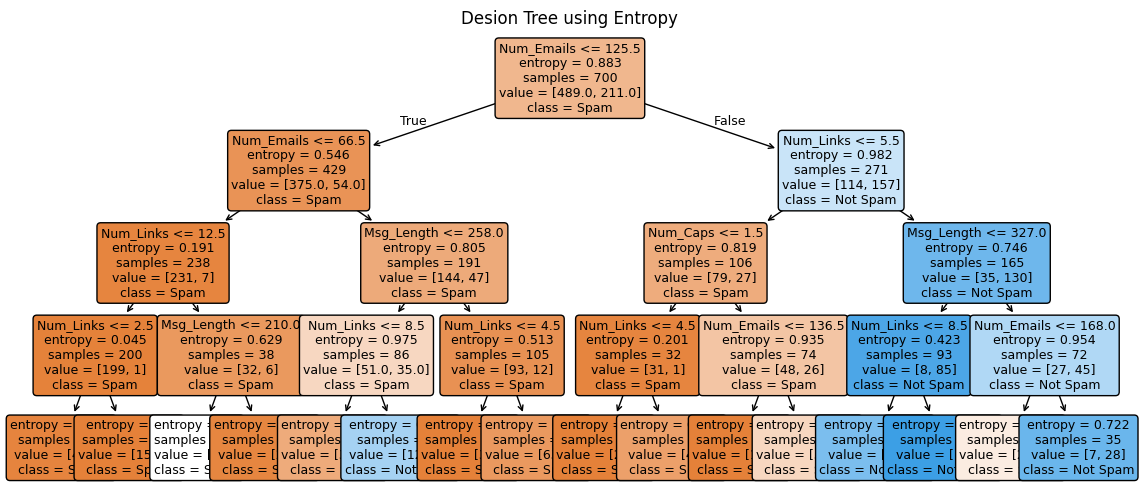

In [13]:
#Visulization the tree
plt.figure(figsize=(14,6))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Spam", "Not Spam"],
    filled = True,
    rounded = True,
    fontsize=9
)

plt.title("Desion Tree using Entropy")
plt.show()

In [15]:
#Print actual desion rules
tree_rules = export_text(model, feature_names=list(X.columns))
print(tree_rules)

|--- Num_Emails <= 125.50
|   |--- Num_Emails <= 66.50
|   |   |--- Num_Links <= 12.50
|   |   |   |--- Num_Links <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- Num_Links >  2.50
|   |   |   |   |--- class: 0
|   |   |--- Num_Links >  12.50
|   |   |   |--- Msg_Length <= 210.00
|   |   |   |   |--- class: 0
|   |   |   |--- Msg_Length >  210.00
|   |   |   |   |--- class: 0
|   |--- Num_Emails >  66.50
|   |   |--- Msg_Length <= 258.00
|   |   |   |--- Num_Links <= 8.50
|   |   |   |   |--- class: 0
|   |   |   |--- Num_Links >  8.50
|   |   |   |   |--- class: 1
|   |   |--- Msg_Length >  258.00
|   |   |   |--- Num_Links <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- Num_Links >  4.50
|   |   |   |   |--- class: 0
|--- Num_Emails >  125.50
|   |--- Num_Links <= 5.50
|   |   |--- Num_Caps <= 1.50
|   |   |   |--- Num_Links <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- Num_Links >  4.50
|   |   |   |   |--- class: 0
|   |   |--- Num_Caps >  1.50
|   |   |   |--

In [17]:
#What if gini impurity
model ={
    "Entropy" : DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
}

for name, m in model.items():
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    print(f"========={name} tree accuracy:")
    print(classification_report(y_test, pred))

=========Entropy tree accuracy:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       215
           1       0.83      0.64      0.72        85

    accuracy                           0.86       300
   macro avg       0.85      0.79      0.81       300
weighted avg       0.86      0.86      0.85       300

